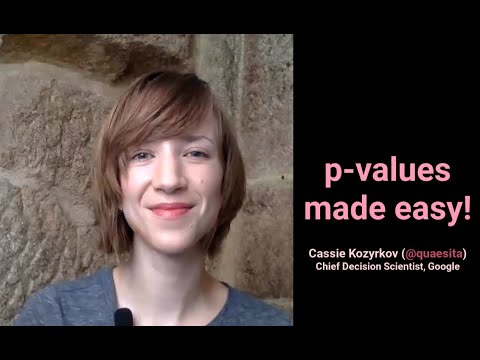

In [1]:
from IPython.display import YouTubeVideo
# Second pre-lecture video
# "What is a p-value"
# https://www.youtube.com/watch?v=9jW9G8MO4PQ
YouTubeVideo('9jW9G8MO4PQ', width=800, height=500)

#1
What is the key factor that makes the difference between ideas that can, and cannot be examined and tested statistically?
    Ideas can be tested statistically if they are measurabl. Expressed as variables with observable, quantifiable data.


What would you describe is the key "criteria" defining what a good null hypothesis is?
        If it is testable with the data, specsific and clear, can be rejected with evidence, and if it States no effect or no difference
        

And what is the difference between a null hypothesis and an alternative hypothesis in the context of hypothesis testing?
        Null Hypothesis: Assumes no effect or relationship.
        Alternative Hypothesis: Suggests a significant effect or relationship exists.


#2

We use a sample to estimate the true value for the population. Hypothesis tests focus on the population parameter, not just the sample result, to make broader conclusions about the entire group based on sample data.

#3

Assumming the null hypothes is true when calculating a p-value helps us determine how likely it is to get the results we observed just by random chance. If the p-value is very small, it suggests that the observed data would be very unlikely if the null were true, giving us reason to question or reject the null hypothesis.

#4

A smaller p-value means that the data we observed is very unlikely if the null hypothesis (H₀) were true. Essentially, it suggests that the chance of getting such extreme results by random variation is very low. As the p-value gets smaller, it becomes harder to believe that the null hypothesis is correct, making it seem more unreasonable or "ridiculous." This is why we often reject the null hypothesis when the p-value is very small—it indicates that something other than random chance is likely going on.

In [1]:
#5

import random

def simulate_head_tilts(trials=10000, couples=124, observed_right_tilts=80):
    successes = 0  # Count how many simulations have 80 or more right tilts

    for _ in range(trials):
        # Simulate 124 coin flips (0 for left tilt, 1 for right tilt)
        right_tilts = sum(random.choice([0, 1]) for _ in range(couples))
        
        # Check if the simulated right tilts are 80 or more
        if right_tilts >= observed_right_tilts:
            successes += 1

    # Calculate the p-value
    p_value = successes / trials
    return p_value

# Run the simulation
p_value = simulate_head_tilts()

# Print the result and interpretation
print(f"Simulated p-value: {p_value}")

# Use the table to interpret the evidence against the null hypothesis
if p_value > 0.1:
    print("No evidence against the null hypothesis")
elif 0.1 >= p_value > 0.05:
    print("Weak evidence against the null hypothesis")
elif 0.05 >= p_value > 0.01:
    print("Moderate evidence against the null hypothesis")
elif 0.01 >= p_value > 0.001:
    print("Strong evidence against the null hypothesis")
else:
    print("Very strong evidence against the null hypothesis")


Simulated p-value: 0.0005
Very strong evidence against the null hypothesis


Simulated p-value is 0.0005

Since the p-value is very small, it’s highly unlikely that the observed result (80 out of 124 couples tilting right) happened by chance under the assumption of a 50/50 split. Therefore, you have very strong evidence to reject the null hypothesis.

This suggests that couples do tend to tilt their heads to the right more often when kissing, indicating a real preference rather than random behavior.

#6

No, a p-value cannot definitively prove whether the null hypothesis is true or false. It only tells us how likely the observed data is, assuming the null hypothesis is true.

In the case of Fido:
    - Innocence (null hypothesis): A p-value cannot prove innocence, only indicate how unlikely the evidence is under the assumption of innocence.
    - Guilt (alternative hypothesis): A low p-value suggests stronger evidence against innocence, but it doesn’t prove guilt—there’s always a chance that the observed result happened by random chance.

There is no p-value, no matter how high or low, that can provide absolute proof for either innocence or guilt. Statistical tests are about probabilities, not certainties.

In [2]:
#7 modified code for one tail test. only p-value calculating part. Couldn't paste all the code form demo II from tut05

# Calculate the observed statistic
observed_statistic = (patient_data.HealthScoreChange > 0).mean()

# Simulated statistics under H0
simulated_statistics = IncreaseProportionSimulations_underH0random

# For a one-tailed test (e.g., testing if observed statistic is GREATER than expected under H0)
SimStats_more_extreme_than_ObsStat = \
    simulated_statistics >= observed_statistic

# Calculate the one-tailed p-value
p_value_one_tailed = SimStats_more_extreme_than_ObsStat.sum() / number_of_simulations

# Print results
print("Number of Simulations: ", number_of_simulations, "\n\n",
      "Number of simulated statistics (under H0)\n",
      'that are "more extreme" than the observed statistic: ',
      SimStats_more_extreme_than_ObsStat.sum(), "\n\n",
      'One-tailed p-value\n(= simulations "more extreme" / total simulations): ', p_value_one_tailed, sep="")


NameError: name 'patient_data' is not defined

1. Comparison Logic Adjustment:

    * In the original two-tailed test, the code checked for deviations in both directions (greater or less than) by using the abs() function:
        abs(simulated_statistics - population_parameter_value_under_H0) >= 
        abs(observed_statistic - population_parameter_value_under_H0)
    * For the one-tailed test, we modified the logic to focus on one direction only. Specifically, we checked if the simulated values are greater than or equal to the observed statistic:
        SimStats_more_extreme_than_ObsStat = simulated_statistics >= observed_statistic


2. p-value Calculation:

    *In the one-tailed test, the p-value is calculated based only on values that are in the direction of interest (e.g., larger than the observed statistic).
    *In the two-tailed test, the p-value accounts for both sides of the distribution, meaning it’s effectively twice as conservative.
    
How This Changes the Interpretation:
    
    * One-Tailed Test:
        * A one-tailed test focuses only on one specific direction (e.g., whether the vaccine improves outcomes). If the effect is in the opposite direction, the one-tailed test ignores it.
        * This type of test is used when we have a prior assumption about the direction of the effect.

    *Two-Tailed Test:
        * A two-tailed test checks for any significant deviation (either positive or negative). This makes it more appropriate when we are open to effects in both directions, but it requires stronger evidence to reject the null hypothesis since it considers both tails of the distribution.
        
        
Should the p-value be Smaller in a One-Tailed Test?

Yes, the p-value for a one-tailed test is generally smaller than for a two-tailed test, because:

    1. In a one-tailed test, we focus on only one direction of the deviation, so there’s less area under the curve to account for.
    2. A two-tailed test is more conservative since it splits the significance level between both tails (e.g., a 0.05 significance level is divided into 0.025 for each tail).

#8

Problem Introduction:
This experiment involves testing whether students from STA130 can distinguish whether tea or milk was poured first in a cup. The goal is to determine if students’ performance is better than random guessing using a formal hypothesis test. This experiment mirrors the classic Fisher's Tea Experiment, where the original goal was to test whether Dr. Bristol could reliably tell the order of tea and milk, or if her success was merely due to chance.


Relationship between this Experiment and Fisher’s Original Test:
    * Fisher’s Test: Dr. Bristol tried to distinguish the order of milk and tea based on personal taste.
    * STA130 Experiment: This involves 80 students each tasting a cup of tea and reporting the order, though the parameter in this case may reflect more abstract judgment rather than personal taste.
    
    
Statements of the Null Hypothesis and Alternative Hypothesis:
    * Null Hypothesis (H₀): The students are just randomly guessing, with a 50% chance of correctly identifying the preparation (i.e., p=0.5).
    * Alternative Hypothesis (H₁): The students are better than random guessing at identifying which was poured first (i.e., p>0.5).
    
In more casual terms:
    * H₀: Students are just guessing, with no real ability to tell the order.
    * H₁: Students show some skill in identifying the correct order more often than by chance.

Quantitative Analysis
The analysis uses a binomial test to assess whether the proportion of correct responses (49 out of 80) is significantly greater than expected by chance (50%).

In [4]:
import numpy as np
from scipy.stats import binomtest

# Set seed for reproducibility
np.random.seed(130)

# Data
sample_size = 80  # Total number of students
successes = 49  # Students correctly identifying the tea preparation
null_prob = 0.5  # Null hypothesis assumes random guessing (50% chance)

# Perform a binomial test using the newer binomtest function
result = binomtest(successes, n=sample_size, p=null_prob, alternative='greater')

# Extract p-value
p_value = result.pvalue

# Print the result
print(f"Sample Size: {sample_size}")
print(f"Number of Correct Guesses: {successes}")
print(f"Null Hypothesis: Students are guessing (50% correct by chance).")
print(f"Alternative Hypothesis: Students are better than random guessing.")
print(f"One-Tailed p-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Conclusion: There is significant evidence to reject the null hypothesis. "
          "Students appear to have some ability to tell which was poured first.")
else:
    print("Conclusion: There is insufficient evidence to reject the null hypothesis. "
          "The results could be due to random guessing.")


Sample Size: 80
Number of Correct Guesses: 49
Null Hypothesis: Students are guessing (50% correct by chance).
Alternative Hypothesis: Students are better than random guessing.
One-Tailed p-value: 0.028332213172560572
Conclusion: There is significant evidence to reject the null hypothesis. Students appear to have some ability to tell which was poured first.


Findings and Discussion:
    * One-tailed p-value: 0.0283
    * Interpretation: Since the p-value (0.0283) is less than 0.05, we reject the null hypothesis. This suggests that the students performed better than random guessing, indicating they may have some ability to distinguish the order in which the tea and milk were poured.


Conclusion Regarding the Null Hypothesis:
There is significant evidence to reject the null hypothesis. This implies that the students' performance was not due to random guessing alone. They seem to have some ability to correctly identify the preparation method, though the exact reason (skill or perception) would require further investigation.